# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,-0.492797,-1.619568,-2.247551,-1.000017
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-03,0.153532,0.018439,-0.843219,0.775438
2013-01-04,-1.366589,1.333698,-0.634766,2.247319
2013-01-05,-1.336753,0.402266,-0.399175,1.186290
2013-01-06,-0.635968,-0.747310,-1.638917,0.095096


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.492797,-1.619568,-2.247551,-1.000017
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-03,0.153532,0.018439,-0.843219,0.775438
2013-01-04,-1.366589,1.333698,-0.634766,2.247319
2013-01-05,-1.336753,0.402266,-0.399175,1.186290


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.366589,1.333698,-0.634766,2.247319
2013-01-05,-1.336753,0.402266,-0.399175,1.186290
2013-01-06,-0.635968,-0.747310,-1.638917,0.095096


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.49279729, -1.61956806, -2.24755141, -1.00001734],
       [-1.51498782,  0.62897208, -0.22228044,  0.92007963],
       [ 0.15353218,  0.01843899, -0.84321856,  0.77543831],
       [-1.36658939,  1.33369799, -0.63476589,  2.24731888],
       [-1.33675273,  0.40226608, -0.39917515,  1.18629021],
       [-0.63596793, -0.74731014, -1.63891722,  0.09509599]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.865594,0.002749,-0.997651,0.704034
std,0.651924,1.050518,0.785924,1.090016
min,-1.514988,-1.619568,-2.247551,-1.000017
25%,-1.359130,-0.555873,-1.439993,0.265182
50%,-0.986360,0.210353,-0.738992,0.847759
75%,-0.528590,0.572296,-0.458073,1.119738
max,0.153532,1.333698,-0.222280,2.247319


Transposing your data

In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.492797,-1.514988,0.153532,-1.366589,-1.336753,-0.635968
B,-1.619568,0.628972,0.018439,1.333698,0.402266,-0.747310
C,-2.247551,-0.222280,-0.843219,-0.634766,-0.399175,-1.638917
D,-1.000017,0.920080,0.775438,2.247319,1.186290,0.095096


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.000017,-2.247551,-1.619568,-0.492797
2013-01-02,0.920080,-0.222280,0.628972,-1.514988
2013-01-03,0.775438,-0.843219,0.018439,0.153532
2013-01-04,2.247319,-0.634766,1.333698,-1.366589
2013-01-05,1.186290,-0.399175,0.402266,-1.336753
2013-01-06,0.095096,-1.638917,-0.747310,-0.635968


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.492797,-1.619568,-2.247551,-1.000017
2013-01-06,-0.635968,-0.747310,-1.638917,0.095096
2013-01-03,0.153532,0.018439,-0.843219,0.775438
2013-01-05,-1.336753,0.402266,-0.399175,1.186290
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-04,-1.366589,1.333698,-0.634766,2.247319


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.492797
2013-01-02   -1.514988
2013-01-03    0.153532
2013-01-04   -1.366589
2013-01-05   -1.336753
2013-01-06   -0.635968
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.492797,-1.619568,-2.247551,-1.000017
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-03,0.153532,0.018439,-0.843219,0.775438


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-03,0.153532,0.018439,-0.843219,0.775438
2013-01-04,-1.366589,1.333698,-0.634766,2.247319


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A   -0.492797
B   -1.619568
C   -2.247551
D   -1.000017
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.492797,-1.619568
2013-01-02,-1.514988,0.628972
2013-01-03,0.153532,0.018439
2013-01-04,-1.366589,1.333698
2013-01-05,-1.336753,0.402266
2013-01-06,-0.635968,-0.747310


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.514988,0.628972
2013-01-03,0.153532,0.018439
2013-01-04,-1.366589,1.333698


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A   -1.514988
B    0.628972
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

-0.49279729014396073

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -1.366589
B    1.333698
C   -0.634766
D    2.247319
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.366589,1.333698
2013-01-05,-1.336753,0.402266


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.514988,-0.222280
2013-01-03,0.153532,-0.843219
2013-01-05,-1.336753,-0.399175


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.514988,0.628972,-0.222280,0.920080
2013-01-03,0.153532,0.018439,-0.843219,0.775438


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.619568,-2.247551
2013-01-02,0.628972,-0.222280
2013-01-03,0.018439,-0.843219
2013-01-04,1.333698,-0.634766
2013-01-05,0.402266,-0.399175
2013-01-06,-0.747310,-1.638917


For getting a value explicitly

In [35]:
df.iloc[1,1]

0.6289720824124134

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

0.6289720824124134

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.153532,0.018439,-0.843219,0.775438


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,0.628972,NaN,0.920080
2013-01-03,0.153532,0.018439,NaN,0.775438
2013-01-04,NaN,1.333698,NaN,2.247319
2013-01-05,NaN,0.402266,NaN,1.186290
2013-01-06,NaN,NaN,NaN,0.095096


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.492797,-1.619568,-2.247551,-1.000017,one
2013-01-02,-1.514988,0.628972,-0.222280,0.920080,one
2013-01-03,0.153532,0.018439,-0.843219,0.775438,two
2013-01-04,-1.366589,1.333698,-0.634766,2.247319,three
2013-01-05,-1.336753,0.402266,-0.399175,1.186290,four
2013-01-06,-0.635968,-0.747310,-1.638917,0.095096,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.153532,0.018439,-0.843219,0.775438,two
2013-01-05,-1.336753,0.402266,-0.399175,1.186290,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.247551,5,NaN
2013-01-02,-1.514988,0.628972,-0.222280,5,1.0
2013-01-03,0.153532,0.018439,-0.843219,5,2.0
2013-01-04,-1.366589,1.333698,-0.634766,5,3.0
2013-01-05,-1.336753,0.402266,-0.399175,5,4.0
2013-01-06,-0.635968,-0.747310,-1.638917,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.247551,-5,NaN
2013-01-02,-1.514988,-0.628972,-0.222280,-5,-1.0
2013-01-03,-0.153532,-0.018439,-0.843219,-5,-2.0
2013-01-04,-1.366589,-1.333698,-0.634766,-5,-3.0
2013-01-05,-1.336753,-0.402266,-0.399175,-5,-4.0
2013-01-06,-0.635968,-0.747310,-1.638917,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.247551,5,NaN,1.0
2013-01-02,-1.514988,0.628972,-0.222280,5,1.0,1.0
2013-01-03,0.153532,0.018439,-0.843219,5,2.0,NaN
2013-01-04,-1.366589,1.333698,-0.634766,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.514988,0.628972,-0.22228,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.247551,5,5.0,1.0
2013-01-02,-1.514988,0.628972,-0.222280,5,1.0,1.0
2013-01-03,0.153532,0.018439,-0.843219,5,2.0,5.0
2013-01-04,-1.366589,1.333698,-0.634766,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A   -0.783461
B    0.272678
C   -0.997651
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    0.688112
2013-01-02    0.978341
2013-01-03    1.265751
2013-01-04    1.466469
2013-01-05    1.533268
2013-01-06    1.395561
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.846468,-0.981561,-1.843219,4.0,1.0
2013-01-04,-4.366589,-1.666302,-3.634766,2.0,0.0
2013-01-05,-6.336753,-4.597734,-5.399175,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.247551,5,NaN
2013-01-02,-1.514988,0.628972,-2.469832,10,1.0
2013-01-03,-1.361456,0.647411,-3.313050,15,3.0
2013-01-04,-2.728045,1.981109,-3.947816,20,6.0
2013-01-05,-4.064798,2.383375,-4.346991,25,10.0
2013-01-06,-4.700766,1.636065,-5.985909,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    1.668520
B    2.081008
C    2.025271
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    6
1    3
2    3
3    5
4    1
5    1
6    2
7    4
8    6
9    0
dtype: int64

In [68]:
s.value_counts()

6    2
3    2
1    2
5    1
2    1
4    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,0.420925,-1.146259,-0.014256,-0.578945
1,-0.027533,-1.180598,0.419968,-2.020572
2,0.361774,-1.623759,0.463088,0.255752
3,1.277018,0.243261,0.439863,0.451114
4,0.273114,-0.286128,-0.185234,0.819007
5,-0.249268,-0.001984,-1.035335,0.168441
6,1.714487,1.021948,0.424587,-0.362085
7,1.510690,-1.294540,-0.313168,0.251550
8,-0.960611,-1.402352,-0.270816,-0.972512
9,2.304749,1.614784,-0.079124,0.155537


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,0.420925,-1.146259,-0.014256,-0.578945
1,-0.027533,-1.180598,0.419968,-2.020572
2,0.361774,-1.623759,0.463088,0.255752
3,1.277018,0.243261,0.439863,0.451114
4,0.273114,-0.286128,-0.185234,0.819007
5,-0.249268,-0.001984,-1.035335,0.168441
6,1.714487,1.021948,0.424587,-0.362085
7,1.510690,-1.294540,-0.313168,0.251550
8,-0.960611,-1.402352,-0.270816,-0.972512
9,2.304749,1.614784,-0.079124,0.155537


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,0.597020,-0.096139,-0.290449,-0.933743
1,0.667439,-1.589583,-0.903097,0.241506
2,0.831931,-0.225722,0.360035,-2.261151
3,-0.683594,0.765992,0.014403,-1.514823
4,-1.236620,0.728344,1.413542,-0.275939
5,1.684554,-1.967939,-1.517105,-2.204090
6,-1.586403,-2.361931,0.153333,-0.479358
7,-0.681623,0.012085,0.314377,-0.174121


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

/var/folders/5j/6vs4zprx4fqcwl49nsw0hzqc0000gn/T/ipykernel_87213/4011806271.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,0.597020,-0.096139,-0.290449,-0.933743
1,0.667439,-1.589583,-0.903097,0.241506
2,0.831931,-0.225722,0.360035,-2.261151
3,-0.683594,0.765992,0.014403,-1.514823
4,-1.236620,0.728344,1.413542,-0.275939
5,1.684554,-1.967939,-1.517105,-2.204090
6,-1.586403,-2.361931,0.153333,-0.479358
7,-0.681623,0.012085,0.314377,-0.174121
8,-0.683594,0.765992,0.014403,-1.514823


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,0.860092,-1.566838
1,bar,one,-0.457586,0.365206
2,foo,two,-0.032221,1.824200
3,bar,three,-0.223595,0.484894
4,foo,two,0.666327,1.904785
5,bar,two,-0.208696,-0.313871
6,foo,one,-0.821549,-0.666772
7,foo,three,1.073439,-1.580867


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.889877,0.536229
foo,1.746088,-0.085492


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.457586  0.365206
    three -0.223595  0.484894
    two   -0.208696 -0.313871
foo one    0.038543 -2.233610
    three  1.073439 -1.580867
    two    0.634106  3.728985

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.563537  1.210640
      two     1.041599  0.858803
baz   one     0.856940 -0.560986
      two     0.295221  0.249207

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.563537
               B    1.210640
       two     A    1.041599
               B    0.858803
baz    one     A    0.856940
               B   -0.560986
       two     A    0.295221
               B    0.249207
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.563537  1.210640
      two     1.041599  0.858803
baz   one     0.856940 -0.560986
      two     0.295221  0.249207

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.563537  1.041599
      B  1.210640  0.858803
baz   A  0.856940  0.295221
      B -0.560986  0.249207

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.563537  0.856940
       B  1.210640 -0.560986
two    A  1.041599  0.295221
       B  0.858803  0.249207

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,0.528071,-1.504475
1,one,B,foo,1.537022,-0.693272
2,two,C,foo,-0.107978,1.819588
3,three,A,bar,0.289250,0.366867
4,one,B,bar,-0.252346,0.291936
5,one,C,bar,0.220844,0.439184
6,two,A,foo,0.799921,1.168957
7,three,B,foo,-1.012816,1.428259
8,one,C,foo,0.256098,1.078324
9,one,A,bar,0.361971,-0.624849


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.361971  0.528071
      B -0.252346  1.537022
      C  0.220844  0.256098
three A  0.289250       NaN
      B       NaN -1.012816
      C -0.727361       NaN
two   A       NaN  0.799921
      B -0.267411       NaN
      C       NaN -0.107978

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    25744
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06   -0.322494
2012-03-07    0.383696
2012-03-08    1.049166
2012-03-09   -0.322942
2012-03-10   -0.579383
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00   -0.322494
2012-03-07 00:00:00+00:00    0.383696
2012-03-08 00:00:00+00:00    1.049166
2012-03-09 00:00:00+00:00   -0.322942
2012-03-10 00:00:00+00:00   -0.579383
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.322494
2012-03-06 19:00:00-05:00    0.383696
2012-03-07 19:00:00-05:00    1.049166
2012-03-08 19:00:00-05:00   -0.322942
2012-03-09 19:00:00-05:00   -0.579383
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.980052
2012-02-29    0.328209
2012-03-31    0.194671
2012-04-30    0.881551
2012-05-31   -0.042871
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.980052
2012-02    0.328209
2012-03    0.194671
2012-04    0.881551
2012-05   -0.042871
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.980052
2012-02-01    0.328209
2012-03-01    0.194671
2012-04-01    0.881551
2012-05-01   -0.042871
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -0.385901
1990-06-01 09:00   -2.043855
1990-09-01 09:00    0.576502
1990-12-01 09:00    0.003971
1991-03-01 09:00    0.629055
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

<AxesSubplot:>

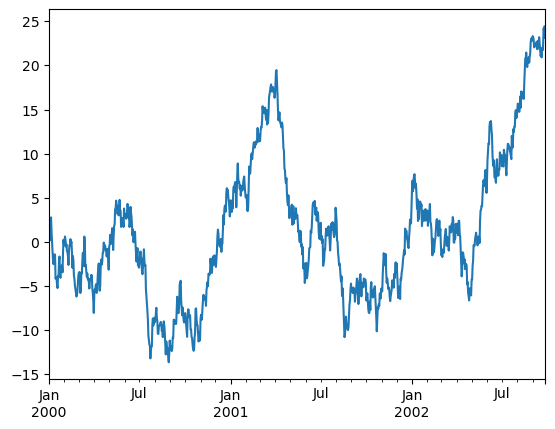

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

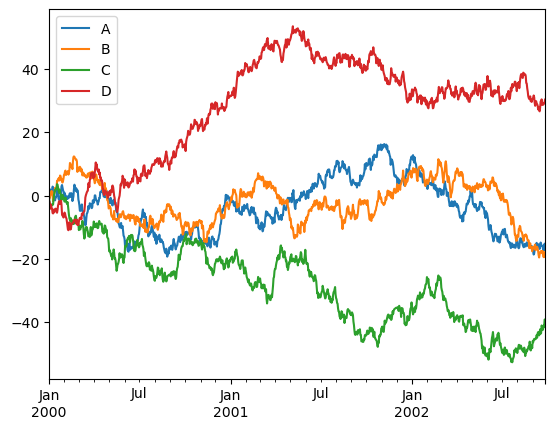

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.065269,-0.509549,-0.727595,-1.748971
1,2000-01-02,2.108968,-0.918330,-2.437207,-2.084067
2,2000-01-03,0.894059,-0.327789,-3.604641,-4.185198
3,2000-01-04,1.099716,0.504925,-3.077869,-2.824630
4,2000-01-05,0.780916,0.473976,-3.333995,-3.171074
...,...,...,...,...,...
995,2002-09-22,-17.042982,-18.890601,-42.059049,29.003799
996,2002-09-23,-15.777282,-19.433340,-41.011779,28.744594
997,2002-09-24,-17.270932,-19.068887,-41.411725,29.160245
998,2002-09-25,-15.173311,-19.234808,-39.161113,29.454880


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,2.065269,-0.509549,-0.727595,-1.748971
2000-01-02,2.108968,-0.918330,-2.437207,-2.084067
2000-01-03,0.894059,-0.327789,-3.604641,-4.185198
2000-01-04,1.099716,0.504925,-3.077869,-2.824630
2000-01-05,0.780916,0.473976,-3.333995,-3.171074
...,...,...,...,...
2002-09-22,-17.042982,-18.890601,-42.059049,29.003799
2002-09-23,-15.777282,-19.433340,-41.011779,28.744594
2002-09-24,-17.270932,-19.068887,-41.411725,29.160245
2002-09-25,-15.173311,-19.234808,-39.161113,29.454880


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.065269,-0.509549,-0.727595,-1.748971
1,2000-01-02,2.108968,-0.918330,-2.437207,-2.084067
2,2000-01-03,0.894059,-0.327789,-3.604641,-4.185198
3,2000-01-04,1.099716,0.504925,-3.077869,-2.824630
4,2000-01-05,0.780916,0.473976,-3.333995,-3.171074
...,...,...,...,...,...
995,2002-09-22,-17.042982,-18.890601,-42.059049,29.003799
996,2002-09-23,-15.777282,-19.433340,-41.011779,28.744594
997,2002-09-24,-17.270932,-19.068887,-41.411725,29.160245
998,2002-09-25,-15.173311,-19.234808,-39.161113,29.454880


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.